In [1]:
import zipfile
import os

train_zip_path = '/content/train.zip'
test_zip_path = '/content/test.zip'

train_output_dir = '/content/cats_dogs_dataset/train'
test_output_dir = '/content/cats_dogs_dataset/test'

with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall(train_output_dir)

with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall(test_output_dir)

print('Train folder contents:', os.listdir(train_output_dir))
print('Test folder contents:', os.listdir(test_output_dir))


Train folder contents: ['cats', '__MACOSX', 'dogs']
Test folder contents: ['cats', '__MACOSX', 'dogs']


In [2]:
import shutil

macosx_train_dir = os.path.join(train_output_dir, '__MACOSX')
macosx_test_dir = os.path.join(test_output_dir, '__MACOSX')

if os.path.exists(macosx_train_dir):
    shutil.rmtree(macosx_train_dir)

if os.path.exists(macosx_test_dir):
    shutil.rmtree(macosx_test_dir)

print('Deleted __MACOSX folders if they existed.')


Deleted __MACOSX folders if they existed.


In [3]:
import cv2
import numpy as np

img_size = 64

def preprocess_images(directory):
    images = []
    labels = []

    cat_dir = os.path.join(directory, 'train', 'cats')
    for filename in os.listdir(cat_dir):
        img_path = os.path.join(cat_dir, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (img_size, img_size))
        img = img.flatten()
        images.append(img)
        labels.append(0)

    dog_dir = os.path.join(directory, 'train', 'dogs')
    for filename in os.listdir(dog_dir):
        img_path = os.path.join(dog_dir, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (img_size, img_size))
        img = img.flatten()
        images.append(img)
        labels.append(1)

    return np.array(images), np.array(labels)

X, y = preprocess_images('/content/cats_dogs_dataset')
X = X / 255.0


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {len(X_train)}, Validation set size: {len(X_val)}')


Training set size: 445, Validation set size: 112


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy with RBF Kernel: {accuracy * 100:.2f}%')


Validation Accuracy with RBF Kernel: 56.25%


Confusion Matrix:
 [[38 26]
 [23 25]]
Classification Report:
               precision    recall  f1-score   support

        Cats       0.62      0.59      0.61        64
        Dogs       0.49      0.52      0.51        48

    accuracy                           0.56       112
   macro avg       0.56      0.56      0.56       112
weighted avg       0.57      0.56      0.56       112



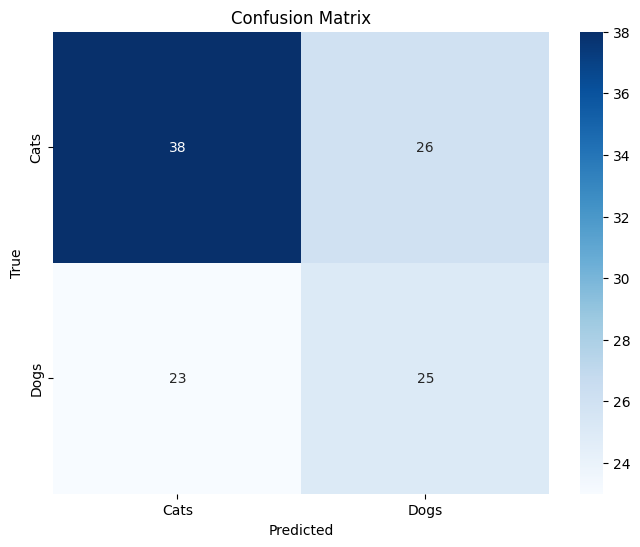

In [7]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y_val, y_pred, target_names=['Cats', 'Dogs'])
print("Classification Report:\n", report)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cats', 'Dogs'], yticklabels=['Cats', 'Dogs'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [8]:
from sklearn.model_selection import cross_val_score

svm = SVC(kernel='rbf', class_weight='balanced')
svm.fit(X_train, y_train)

scores = cross_val_score(svm, X_train, y_train, cv=5)
print(f'Cross-Validation Accuracy: {scores.mean() * 100:.2f}%')

Cross-Validation Accuracy: 61.35%
